In [19]:
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit_aer import AerSimulator

## Deutsch's Algorithm

In [22]:
def deutsch_function(case: int): 

    if case not in [1, 2, 3, 4]: 
        raise ValueError(' case must be 1, 2, 3, or 4')
    
    f = QuantumCircuit(2)
    if case in [2, 3]: 
        f.cx(0, 1)
    if case in [3, 4]: 
        f.x(1)

    return f 

def compile_circuit(function: QuantumCircuit): 

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n+1))

    qc.barrier()
    qc.compose(function, inplace = True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

def deutsch_algorithm(function: QuantumCircuit): 

    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots = 1, memory = True).result()
    measurements = result.get_memory()

    if measurements[0] == '0': 
        return 'constant'
    return 'balanced'


In [32]:
f = deutsch_function(3)
display(f.draw())
display(deutsch_algorithm(f))

q_0: ──■───────
     ┌─┴─┐┌───┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

'balanced'

## Deutsch-Jozsa Algorithm

In [33]:
import numpy as np 

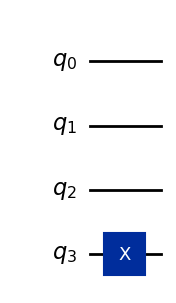

In [51]:
def dj_function(num_qubits): 

    qc = QuantumCircuit(num_qubits + 1)

    if np.random.randint(0, 2): 
        qc.x(num_qubits)
    if np.random.randint(0, 2): 
        return qc
    
    on_states = np.random.choice(
        range(2**num_qubits), 
        2**num_qubits // 2, 
        replace = False
    )

    def add_cx(qc, bit_string): 
        for qubit, bit in enumerate(reversed(bit_string)): 
            if bit == '1': 
                qc.x(qubit)
        return qc 
    
    for state in on_states: 
        qc.barrier()
        qc = add_cx(qc, f'{state:0b}')
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f'{state:0b}')

    qc.barrier()
    
    return qc

display(dj_function(3).draw('mpl'))

In [53]:
def compile_circuit(function: QuantumCircuit):
    
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

def dj_algorithm(function: QuantumCircuit):

    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

In [65]:
f = dj_function(3)
display(f.draw())
display(dj_algorithm(f))

░       ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░                 ░ 
q_0: ─░───■───░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░─
      ░   │   ░ └───┘  │  └───┘ ░ ├───┤  │  ├───┤ ░ ┌───┐  │  ┌───┐ ░ 
q_1: ─░───■───░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─
      ░   │   ░        │        ░ ├───┤  │  ├───┤ ░ ├───┤  │  ├───┤ ░ 
q_2: ─░───■───░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─
      ░ ┌─┴─┐ ░      ┌─┴─┐      ░ └───┘┌─┴─┐└───┘ ░ └───┘┌─┴─┐└───┘ ░ 
q_3: ─░─┤ X ├─░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├──────░─
      ░ └───┘ ░      └───┘      ░      └───┘      ░      └───┘      ░

'balanced'